# Singular Value Decomposition

(2.1) **Geometry of linear operators.** In the code challenge, we saw that a unit circle is mapped by a square matrix $\mathbf A$ into an ellipse. It turns out that the effect of a square matrix $\mathbf A \in \mathbb R^{2 \times 2}$ as an operator on $\mathbb R^2$ is to dilate the space outwards in two orthogonal directions (possibly some directions shrinking to zero, but never in a negative direction), then resulting space is rotated twice. To see this, let $\mathbf A = \mathbf U \mathbf \Sigma \mathbf V^\top$ be the SVD of $\mathbf A$, then $\mathbf A = (\mathbf U \mathbf V^\top) (\mathbf V \mathbf\Sigma \mathbf V^\top)$. The factor $\mathbf V \mathbf\Sigma \mathbf V^\top$ dilates the space two orthogonal directions defined by the columns of $\mathbf V$ while the strength of the dilation is determined by the singular values in the diagonal of $\mathbf \Sigma$. 
We can interpret $\mathbf V$ and $\mathbf V^\top$ as change of basis matrices, i.e. in terms of a sum of projection operators $\sum_{i=1}^n \sigma_i \mathbf v_i \mathbf v_i^\top$. This is followed by a product $\mathbf U \mathbf V^\top$ of two isometries of $\mathbb R^2$. It can be [easily calculated](https://math.stackexchange.com/a/2924263) that orthogonal transformations of $\mathbb R^2$ are either rotations or reflections, so that we get a final ellipse. Since the rank of $\mathbf A$ is equal to the number of nonzero singular values, whenever $\mathbf A$ is singular, some of its singular values will be zero corresponding to an axis where the ellipse collapses (see figure below). 

<br>

(2.2) **Polar decomposition.** The decomposition of an operator $\mathbf A \in \mathbb R^{n\times n}$ into $\mathbf A = \mathbf Q \mathbf P$ where $\mathbf Q$ is orthogonal and $\mathbf P$ is symmetric positive semidefinite is called the **polar decomposition**. Geometrically, we can see that $\mathbf P$ should be unique. Indeed, observe that $\mathbf P^2 = \mathbf A^\top \mathbf A$ and $\mathbf A^\top \mathbf A$ is evidently symmetric positive semidefinite, so it has a unique symmetric positive semidefinite square root $\sqrt{\mathbf A^\top \mathbf A}$ [[Thm. 3]](https://www.math.drexel.edu/~foucart/TeachingFiles/F12/M504Lect7.pdf). Thus, $\mathbf P = \mathbf V \mathbf \Sigma \mathbf V^\top = \sqrt{\mathbf A ^\top \mathbf A}$ by uniqueness. Note however that the eigenvectors the orthogonal eigendecomposition into need not be unique (e.g. when the kernel of $\mathbf A$ is nonzero). For real matrices, the isometries are precisely the orthogonal matrices. Thus, the polar decomposition can be written as $\mathbf A = \mathbf Q \sqrt{\mathbf A^\top \mathbf A}$ for some isometry $\mathbf Q$; cf. [[Lem. 9.6]](https://www.maa.org/sites/default/files/pdf/awards/Axler-Ford-1996.pdf) which states the polar decomposition in terms of the existence of such an isometry. The matrix $\mathbf Q$ is only unique if $\mathbf A$ is nonsingular. For instance, if $\mathbf A$ is singular, then we can reflect across the axis where the space is collapsed and still get the same transformation. <br>
   
**Remark.** The name "polar decomposition" comes from the analogous decomposition of complex numbers as $z = re^{i\theta}$ in polar coordinates. Here $r = \sqrt{\bar z z }$ (analogous to $\sqrt{\mathbf A^* \mathbf A}$) and multiplication by $e^{i\theta}$ is an isometry of $\mathbb C$ (analogous to the isometric property of $\mathbf Q$). For complex matrices we consider $\mathbf A^*\mathbf A$ and unitary matrices in the SVD.
    
<br>

(2.3) **Computing the polar decomposition.** In the following code cell, we verify the theory by calculating the polar decomposition from `u, s, vT = np.linalg.svd(A)`. We set `Q = u @ vT` and `P = vT.T @ np.diag(s) @ vT`. Some singular values are zero for singular `A`  (left) while all are nonzero for nonsingular `A` (right). The eigenvectors of `P` are scaled by the corresponding eigenvalues, then rotated with `Q`. The rotated eigenvectors of `P` lie along the major and minor axis of the ellipse: the directions where the circle is stretched prior to rotation. The code checks out in that the eigenvectors (obtained from SVD) line up nicely along the axes where the circle is elongated in the scatter plot (obtained by plotting the output vectors `A @ [x, y]` where `[x, y]` is a point on the unit circle).

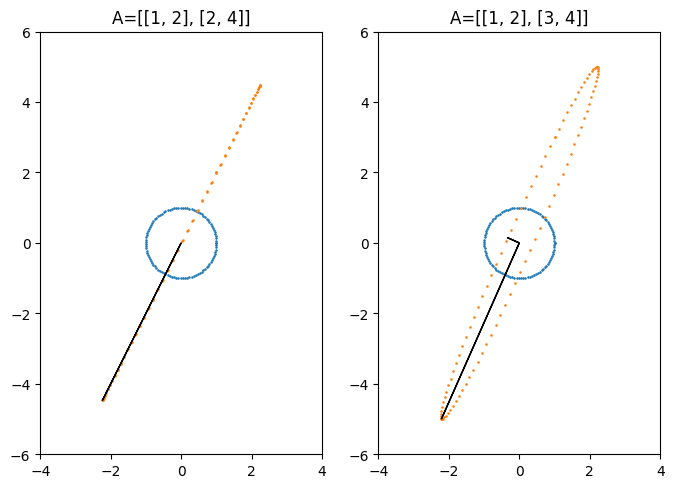

In [1]:
import numpy as np
import matplotlib.pyplot as plt


S = np.array([[1, 2], [2, 4]])
T = np.array([[1, 2], [3, 4]])
matrices = [S, T]

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
for i in [0, 1]:
    A = matrices[i]
    
    # Circle
    t = np.linspace(-1, 1, 100)

    # Transform unit circle
    Ax = A[0, :] @ np.stack([np.cos(2*np.pi*t), np.sin(2*np.pi*t)], axis=0)
    Ay = A[1, :] @ np.stack([np.cos(2*np.pi*t), np.sin(2*np.pi*t)], axis=0)
    ax[i].scatter(np.cos(2*np.pi*t), np.sin(2*np.pi*t), s=0.7)
    ax[i].scatter(Ax, Ay, s=0.7)
    ax[i].axis('scaled')
    ax[i].set_ylim(-6, 6)
    ax[i].set_xlim(-4, 4)

    # Obtain U and P from SVD
    u, s, vT = np.linalg.svd(A)
    Q = u @ vT
    P = vT.T @ np.diag(s) @ vT

    # Get eigenvectors -> scale by singular values -> rotate -> plot
    eig_vals = s
    eig_vecs = vT.T
    ax[i].arrow(0, 0, eig_vals[0]*(Q @ eig_vecs[:, 0])[0], eig_vals[0]*(Q @ eig_vecs[:, 0])[1]) # rotate v1
    ax[i].arrow(0, 0, eig_vals[1]*(Q @ eig_vecs[:, 1])[0], eig_vals[1]*(Q @ eig_vecs[:, 1])[1]) # rotate v2
    ax[i].set_title(f'A={A.tolist()}')

<br>

(2.4) **SVD Proof.** The SVD states that any real matrix $\mathbf A \in \mathbb R^{m \times n}$ can be decomposed as $\mathbf A = \mathbf U \mathbf \Sigma \mathbf V^\top$ where $\mathbf U \in \mathbb R^{m \times m}$ and $\mathbf V \in \mathbb R^{n \times n}$ are orthonogonal matrices and $\mathbf\Sigma  \in \mathbb R^{m \times n}$ is a diagonal matrix with nonnegative real numbers on the diagonal. The diagonal entries $\sigma_i$ of $\mathbf \Sigma$ are called the **singular values** of $\mathbf A.$ The number $r$ of nonzero singular values is equal to the rank of $\mathbf A$ as we will show shortly. 

The following proof of the SVD is constructive, i.e. we construct the singular values, and left and right singular vectors of $\mathbf A.$
    Let $r = \text{rank }\mathbf A$, then $r \leq \min(m, n)$. 
    Observe that $\mathbf A^\top \mathbf A \in \mathbb R^{n\times n}$ is symmetric positive semidefinite. 
    It follows that the eigenvalues of $\mathbf A^\top \mathbf A$ are nonnegative. 
    and that there exists an eigendecomposition $\mathbf A^\top \mathbf A = \mathbf V \mathbf \Sigma^2 \mathbf V^\top$ where $\mathbf V$ is an orthogonal matrix and $\mathbf \Sigma^2$ is a diagonal matrix of real eigenvalues of $\mathbf A^\top \mathbf A$ [[Theorem 8.3]](https://www.maa.org/sites/default/files/pdf/awards/Axler-Ford-1996.pdf). Here we let $\sigma_i = \mathbf \Sigma_{ii}$ such that $\sigma_1 \geq \sigma_2 \geq \ldots \sigma_r > 0$ where $r = \text{rank }\mathbf A.$ This comes from $\text{rank }\mathbf A ^\top \mathbf A = \text{rank }\mathbf A = r,$ and $\mathbf A^\top \mathbf A$ is similar to $\mathbf\Sigma^2,$ so that the first $r$ singular values of $\mathbf A$ are nonzero while the rest are zero. The singular values characterize the geometry of $\mathbf A$. For instance if $0 \leq r < m$, then the hyperellipse image of $\mathbf A$ collapses to have zero volume. The vectors $\mathbf v_1, \ldots, \mathbf v_n$ form an orthonormal basis for $\mathbb R^n$ which we call **right singular vectors.** Now that we are done with the domain of $\mathbf A,$ we proceed to its codomain.

We know $\mathbf A \mathbf v_i$ for $i = 1, 2, \ldots, n$ span the image of $\mathbf A.$ For $i = 1, 2, \ldots, r$, it can be shown that $\lVert \mathbf A \mathbf v_i \rVert = \sigma_i.$ Since the first $r$ singular values are nonzero, we can define unit vectors $\mathbf u_i = {\sigma_i}^{-1}\mathbf A \mathbf v_i \in \mathbb R^m$ for $i = 1, \ldots, r.$ These are the **left singular vectors** of $\mathbf A.$ It follows that $\mathbf A \mathbf v_i = \sigma_i \mathbf u_i$ for $i = 1, \ldots, r$ and $\mathbf A \mathbf v_i = \mathbf 0$ for $i > r.$ Observe that the vectors $\mathbf u_i$ are orthogonal 
    $$
    \mathbf u_i^\top \mathbf u_j = \frac{1}{\sigma_i\sigma_j}\mathbf v_i^\top\mathbf A^\top \mathbf A \mathbf v_j = \frac{1}{\sigma_i\sigma_j}\mathbf v_i^\top {\sigma_j}^2 \mathbf v_j = \delta_{ij} \frac{{\sigma_j}^2}{\sigma_i\sigma_j} = \delta_{ij}.
    $$

Thus, $\mathbf u_1, \ldots \mathbf u_r$ is an orthonormal basis for the image of $\mathbf A$ in $\mathbb R^m.$ From here we can already obtain the **compact SVD** which already contains all necessary information: $\mathbf A = \sum_{k=1}^r \sigma_k \mathbf  u_k \mathbf v_k^\top$ or $\mathbf A = \mathbf U_r \mathbf \Sigma_r \mathbf V_r^\top$ (bottom of Figure 10.1 below with $r = n$) where $\mathbf U_r = [\mathbf u_1, \ldots, \mathbf u_r] \in \mathbb R^{m \times r},$ $\mathbf\Sigma_r = \mathbf\Sigma[:r, :r],$ and $\mathbf V^\top_r = \mathbf V[:, :r]^\top.$ To get the **full SVD**, we extend $\mathbf U_r$ to an orthonormal basis of $\mathbb R^m$ by Gram-Schmidt obtaining $\mathbf U = [\mathbf U_r | \mathbf U_{m-r}] \in \mathbb R^{m \times m}.$ For $\mathbf\Sigma$, we either pad ($m > n$) or remove zero rows ($m < n$) to get an $m \times n$ diagonal matrix. Finally, with these matrices, we can write $\mathbf A \mathbf V = \mathbf U \mathbf \Sigma$ so that $\mathbf A = \mathbf U \mathbf \Sigma \mathbf V^\top$ where the factors have the properties stated in the SVD. □

<br>
  <p align="center">
  <img src="../img/svd.png" alt="drawing" width="400"/>
  </p>
<br>

(2.5) Here we constrcut the (compact) SVD that follows the proof in code. The result looks great:

In [2]:
# calculate matrix V from eigenvectors of A^T A
np.random.seed(0)
A = np.random.randn(5, 4)
B = A.T @ A # shape 4 x 4

# compute eigenvalues / vectors, sorted decreasing
eigvals, eigvecs = np.linalg.eig(B)
eigvecs = eigvecs[:, np.argsort(-eigvals)]
eigvals = -np.sort(-eigvals)

# compact SVD -- too lazy to code Gram-Schmidt
# UPDATE: see 10_stability_gram-schmidt.py
Sigma = np.zeros(shape=(A.shape[1], A.shape[1]))
U = np.zeros(shape=(A.shape[0], A.shape[1]))
V = eigvecs[: A.shape[1]]
for i in range(len(eigvals)):
    Sigma[i, i] = np.sqrt(eigvals[i])
    U[:, i] = A @ eigvecs[:, i] / np.sqrt(eigvals[i])

# print the results
print('\nA=')
print(np.round(A, 4))
print('\nU @ Sigma @ V.T =') 
print(np.round(A, 4))
print('\nFrobenius norms:')
print('|| A - U @ Sigma @ V.T || =', np.linalg.norm(U @ Sigma @ V.T - A))
print('|| V.T @ V - I || =', np.linalg.norm(V.T @ V - np.eye(4)))
print('|| U.T @ U - I || =', np.linalg.norm(U.T @ U - np.eye(4)))


A=
[[ 1.7641  0.4002  0.9787  2.2409]
 [ 1.8676 -0.9773  0.9501 -0.1514]
 [-0.1032  0.4106  0.144   1.4543]
 [ 0.761   0.1217  0.4439  0.3337]
 [ 1.4941 -0.2052  0.3131 -0.8541]]

U @ Sigma @ V.T =
[[ 1.7641  0.4002  0.9787  2.2409]
 [ 1.8676 -0.9773  0.9501 -0.1514]
 [-0.1032  0.4106  0.144   1.4543]
 [ 0.761   0.1217  0.4439  0.3337]
 [ 1.4941 -0.2052  0.3131 -0.8541]]

Frobenius norms:
|| A - U @ Sigma @ V.T || = 2.6045173161491404e-15
|| V.T @ V - I || = 3.608690378114466e-15
|| U.T @ U - I || = 2.9071854849044205e-14


<br>

(2.6) **Singular vectors in the SVD.** Given the SVD we can write $\mathbf A = \sum_{i=1}^r \sigma_i \mathbf u_i \mathbf v_i^\top$ as a sum of rank one (!) terms. Recall that $\sigma_i \mathbf u_i = \mathbf A \mathbf v_i$. Writing $\mathbf A = \sum_{i=1}^r (\mathbf A \mathbf v_i) \mathbf v_i^\top$ is trivial given an ONB $\mathbf v_1, \ldots, \mathbf v_n$ of $\mathbb R^n.$ What is nontrivial in the SVD is that (1) an ONB always exists that is "natural" to $\mathbf A$, and (2) the corresponding image vectors $\mathbf A \mathbf v_i$ which span $\textsf{col }\mathbf A$ are also orthogonal in $\mathbb R^m.$
  <br>
  <p align="center">
  <img src="../img/svd_ellipse.png" alt="Source: http://gregorygundersen.com/image/svd/ellipse.png" width="400"/>
  </p>
  <br><br>

  Another important characterization of the singular vectors is in terms of eigenvalues of $\mathbf A^\top \mathbf A$ and $\mathbf A \mathbf A^\top.$ By construction, $\mathbf v_1, \ldots, \mathbf v_n$ are eigenvectors of $\mathbf A^\top \mathbf A$ with respect to eigenvalues ${\sigma_1}^2, \ldots {\sigma_r}^2, 0, \ldots, 0.$ On the other hand,

  $$\mathbf A \mathbf A^\top \mathbf u_i = \frac{1}{\sigma_i} \mathbf A \mathbf A^\top \mathbf A \mathbf v_i = \frac{1}{\sigma_i} {\sigma_i}^2 \mathbf A \mathbf v_i = {\sigma_i}^2 \mathbf u_i$$

  for $i = 1, \ldots, r.$ This is also trivially true for $i > r.$ Thus, $\mathbf u_1, \ldots, \mathbf u_m$ are $m$ orthogonal eigenvectors of $\mathbf A \mathbf A^\top$ w.r.t. eigenvalues ${\sigma_1}^2, \ldots {\sigma_r}^2, 0, \ldots, 0$.
  
  <br>

  <p align="center">
  <img src="../img/svd_change_of_basis.svg" alt="drawing" width="400"/> <br> 
  <b>Figure. </b> SVD as diagonalization.
  </p>

<br>

(2.7) **SVD as diagonalization.** We can think of the SVD as a change of basis so that the $m \times n$ matrix $\mathbf A$ has a diagonal representation (see Figure above). Recall that we recover the components of a vector in an ONB by performing projection, so we can replace inverses with transpose. In action: $\mathbf A = \mathbf U \mathbf U^\top \mathbf A \mathbf V \mathbf V^\top = \mathbf U \mathbf \Sigma \mathbf V^\top.$ Here $\mathbf U \mathbf U^\top = \sum_{i = 1}^m \mathbf u_i \mathbf {u_i}^\top$ is the change of basis of output vectors of $\mathbf \Sigma$ defined by the columns of $\mathbf U$ and, similarly, $\mathbf V \mathbf V^\top = \sum_{j = 1}^m \mathbf v_j \mathbf {v_j}^\top$ is the change of basis of input vectors of $\mathbf \Sigma$ defined by ONB of $\mathbb R^n$ that form the columns of $\mathbf V.$ Thus, the SVD is analogous to diagonalization for square matrices, but instead of eigenvalues, we diagonalize into an $m \times n$ diagonal matrix of singular values. From [Chapter 10](https://www.mathworks.com/content/dam/mathworks/mathworks-dot-com/moler/eigs.pdf) of [Moler, 2013]: 
  
  > In abstract linear algebra terms, eigenvalues are relevant if a square, $n$-by-$n$ matrix $\mathbf A$ is thought of as mapping $n$-dimensional space onto itself. We try to find a basis for the space so that the matrix becomes diagonal. This basis might be complex even if $\mathbf A$ is real. In fact, if the eigenvectors are not linearly independent, such a basis does not even exist. The SVD is relevant if a possibly rectangular, $m$-by-$n$ matrix $\mathbf A$ is thought of as mapping $n$-space onto $m$-space. We try to find one change of basis in the domain and a usually different change of basis in the range so that the matrix becomes diagonal. Such bases always exist and are always real if $\mathbf A$ is real. In fact, the transforming matrices are orthogonal or unitary, so they preserve lengths and angles and do not magnify errors.

<br>

(2.8) **Computing the SVD.** In the following cell, we calculate 3 things for a random matrix $\mathbf A[i, j] \sim \mathcal{N}(0, 1)$: (1) equality between the eigenvalues of $\sqrt{\mathbf A^\top \mathbf A}$ and the singular values of $\mathbf A$; (2) difference bet. max. singular value $\sigma_1$ and $\max_{\lVert \mathbf x \rVert_2 = 1} \lVert \mathbf A \mathbf x \rVert_2$; and (3) whether $\mathbf A\mathbf v_i = \sigma_i \mathbf u_i$ for $i = 1, 2.$

In [3]:
rng = np.random.RandomState(0)
A = rng.randn(2, 2)
u, s, vT = np.linalg.svd(A)

# Check eigenvalues of √(AᵀA) = singular values A
print('λ(√AᵀA): ', -np.sort(-np.sqrt(np.linalg.eig( A.T @ A )[0])))
print('σ(A):    ', s)

# Check that maximum singular value = maximum dilation of circle
N = 1000 # <--- no. of points on the unit circle
t = np.linspace(-1, 1, N)
unit_circle = np.stack([np.cos(2*np.pi*t), np.sin(2*np.pi*t)], axis=0)
outputs = A @ unit_circle
max_output_norm = np.linalg.norm(A @ unit_circle, axis=0).max()

# Check that Av = σu
print(f'| Av - σu |.max()   = {np.abs(u @ np.diag(s) - A @ vT.T).max():.3e}') 
print(f'σ₁ - max ‖Ax‖ / ‖x‖ = {abs(max_output_norm - s[0]):.3e}')

λ(√AᵀA):  [2.75276951 1.29375301]
σ(A):     [2.75276951 1.29375301]
| Av - σu |.max()   = 2.220e-16
σ₁ - max ‖Ax‖ / ‖x‖ = 1.673e-07


(2.9) **Spectral theorem proof.** The spectral theorem is an extremely beautiful result which one can think of as the SVD for linear operators. In fact, the construction of the SVD relies on a spectral decomposition, i.e. of $\mathbf A^\top \mathbf A$ which is automatically symmetric. 
A key property of symmetric matrices used in the proof is that if $V$ is a subspace, then $V^\perp$ is invariant under $\mathbf A.$ This will allow us to recursively construct the eigenvector directions of $\mathbf A.$ The real spectral theorem generalizes to self-adjoint operators on real inner product spaces as in [[Theorem 8.3]](https://www.maa.org/sites/default/files/pdf/awards/Axler-Ford-1996.pdf). <br><br>

    > **Theorem.** (Real spectral theorem). Let $\mathbf A \in \mathbb R^{n \times n}$ be a symmetric matrix. Then
      (1) the eigenvalues of $\mathbf A$ are real;
      (2) the eigenvectors of $\mathbf A$ corresponding to distinct eigenvalues are orthogonal; and
      (3) there exists an ONB of $\mathbb R^n$ of eigenvectors of $\mathbf A.$ This allows the diagonalization 
      $\mathbf A = \sum_{k=1}^n \lambda_k \mathbf v_k {\mathbf v_k}^\top = \mathbf V \mathbf \Lambda \mathbf V^\top$ 
      where $\mathbf V$ is a real orthogonal matrix of column stacked eigenvectors $\mathbf v_1, \ldots, \mathbf v_n$ and $\mathbf \Lambda$ is a real diagonal matrix of eigenvalues $\lambda_1, \ldots, \lambda_n.$ 
  
  <br>
  
  **Proof.** [Olver, 2018]. We skip (1) and (2). To prove (3), we perform induction on $n.$ For $n = 1$, this is trivially true with $\mathbf A = [a]$ and $\lambda = a \in \mathbb R$ with eigenvector $1.$ Suppose $n \geq 2$ and the spectral theorem is true for symmetric matrices in $\mathbb R^{n-1}.$ By the [Fundamental Theorem of Algebra (FTA)](https://math.libretexts.org/Bookshelves/Linear_Algebra/Book%3A_Linear_Algebra_(Schilling_Nachtergaele_and_Lankham)/07%3A_Eigenvalues_and_Eigenvectors/7.04%3A_Existence_of_Eigenvalues), there exists at least one eigenvalue $\lambda$ of $\mathbf A$ which we know to be real. Along with $\lambda$ comes a nonzero unit eigenvector $\mathbf v \in \mathbb R^n.$ Let $\mathbf v^\perp$ be the subspace orthogonal to the $1$-dimensional subspace spanned by $\mathbf v.$ Then, $\dim (\mathbf v^\perp) = n-1$ so that $\mathbf v^\perp$ has an orthonormal basis $\mathbf y_1, \ldots, \mathbf y_{n-1} \in \mathbb R^n.$ Moreover, $\mathbf v^\perp$ is invariant under $\mathbf A$ as a consequence of symmetry.
  Suppose $\mathbf w \in \mathbf v^\perp,$ then 
  $$
  \begin{aligned}
  (\mathbf A \mathbf w)^\top \mathbf v 
  &= \mathbf w ^\top \mathbf A^\top \mathbf v  \\
  &= \mathbf w ^\top \mathbf A \mathbf v \\
  &= \lambda \mathbf w ^\top \mathbf v = 0.
  \end{aligned}
  $$
  That is, $\mathbf A \mathbf w \in \mathbf v^\perp.$ It follows that the restriction ${\mathbf A}{|_ {\mathbf v^\perp}}$ of $\mathbf A$ on $\mathbf v^\perp$ is well-defined and we can write $\mathbf A| _ {\mathbf v^\perp} = \mathbf Y \mathbf B \mathbf Y^\top$ where $\mathbf Y = [\mathbf y_1, \ldots , \mathbf y_{n-1}] \in \mathbb R ^{n \times (n-1)}$ and $\mathbf B \in \mathbb R^{(n-1) \times (n-1)}$ is the coordinate representation of $\mathbf A| _ {\mathbf v^\perp},$ i.e. $\mathbf B = \mathbf Y^\top \mathbf A \mathbf Y.$ Observe that $\mathbf B$ is symmetric:
  $$
  b_{ij} = {\mathbf y_i}^\top \mathbf A \mathbf y_j = (\mathbf A^\top \mathbf y_i)^\top \mathbf y_j = (\mathbf A \mathbf y_i)^\top \mathbf y_j = b_{ji}.
  $$
  By the inductive hypothesis, $\mathbf B$ has a spectral decomposition in terms of real eigenvalues $\omega_1, \ldots, \omega_{n-1}$ and orthonormal eigenvectors $\mathbf u_1, \ldots, \mathbf u_{n-1}$ so that $\mathbf B = \mathbf U \mathbf \Omega \mathbf U^\top$ where $\mathbf \Omega = \text{diag}(\omega_1, \ldots, \omega_{n-1})$ is a diagonal matrix of real eigenvalues $\omega_1, \ldots, \omega_{n-1}$ and $\mathbf U = [\mathbf u_1, \ldots, \mathbf u_{n-1}] \in \mathbb R^{(n-1) \times (n-1)}$ is orthogonal. Thus, 
  $$
  {\mathbf A}{|_ {\mathbf v^\perp}} = (\mathbf Y \mathbf U) \mathbf \Omega ( \mathbf Y \mathbf U)^\top.
  $$
  Let $\mathbf w_ j = \sum_{k=1}^{n-1} u_{kj} \mathbf y_k = \mathbf Y \mathbf u_j \in \mathbf v^\perp$ for $j = 1, \ldots, n-1.$ 
  We use the amazing fact that the inner product of vectors $\mathbf w_i$ and $\mathbf w_j$ represented under an ONB $\mathbf y_1, \ldots, \mathbf y_{n-1}$ reduces to the inner product of its coordinate vectors $\mathbf u_i$ and $\mathbf u_j$ which are orthonormal by the inductive hypothesis!  That is,
  $$
  {\mathbf w_ i}^\top \mathbf w_j = {(\mathbf Y \mathbf u_i)}^\top {\mathbf Y \mathbf u_j} = {\mathbf u_i}^\top \mathbf Y ^\top {\mathbf Y \mathbf u_j} = \delta_{ij}.
  $$
  Hence, $\mathbf w_1, \ldots, \mathbf w_{n-1}$ is an ONB for $\mathbf v^\perp.$ Since $\mathbf v \perp \mathbf w_j$ for $j=1, \ldots, n-1,$ by maximality (1) $\mathbf v, \mathbf w_1 \ldots, \mathbf w_{n-1}$ is an orthonormal basis of $\mathbb R^n.$ 
  Furthermore, (2) $\mathbf A \mathbf v = \lambda \mathbf v$ and $\mathbf A \mathbf w_j = \omega_j \mathbf w_j$ for $j=1, \ldots, n-1.$ 
  These two facts allows us to write
  $$
  \begin{aligned}
  \mathbf A
  &= \lambda \mathbf v \mathbf v^\top + \sum_{j=1}^{n-1}\omega_j \mathbf w_j{\mathbf w_j}^\top \\
  &= \Bigg[\mathbf v\; \mathbf w_1 \ldots \; \mathbf w_{n-1}\Bigg] \begin{bmatrix}
   \lambda & & \\ 
     & \omega_1 & & \\ 
     &   &  \ddots & \\
     &   &  & \omega_{n-1}
  \end{bmatrix}
  \begin{bmatrix}
  \mathbf v^\top \\
  {\mathbf w_1}^\top \\ 
  \vdots
  \\
  {\mathbf w_{n-1}}^\top
  \end{bmatrix}.
  \end{aligned}
  $$
  Observe that (1) allowed a coordinate representation $\mathbf A = \mathbf V \mathbf \Omega \mathbf V^\top$ where $\mathbf V$ is orthogonal, and (2) guaranteed that $\mathbf \Omega$ is diagonal. 
  This completes the proof! □
  
<br>

(2.10) **Code demo: spectral theorem proof.** In the following code cell, we implement the constuction above of an orthonormal eigenbasis for $\mathbb R^n$ for $n = 3$ with respect to a randomly generated symmetric matrix `A`. The first eigenvector $\mathbf v$ is obtained by cheating a bit, i.e. using `np.linalg.eig`. Then, two linearly independent vectors $\mathbf y_1$ and $\mathbf y_2$ were constructed by calculating the equation of the plane orthogonal to $\mathbf v$ and finding $x$'s such that $(x, 1, 1)$ and $(x, 1, 0)$ are points on the plane $\mathbf v^\perp.$ Finally, the vectors $\mathbf y_1$ and $\mathbf y_2$ are made to be orthonormal by Gram-Schmidt. By the inductive hypothesis, we are allowed to compute `omega, U = np.linalg.eig(B)` where `B = Y.T @ A @ Y`. Then, we set `W = Y @ U` to be the $n-1$ eigenvector directions in the orthogonal plane. This is concatenated with $\mathbf v$ to get the final matrix `V` of all $n$ eigenvectors. The eigenvalues are constructed likewise in decreasing order. 

In [4]:
np.random.seed(0)

# sSample a random symmetric matrix
A = np.random.randn(3, 3)
A = A.T @ A  

# Calculate an eigenvalue-eigenevctor pair using numpy
eigvals, eigvecs = np.linalg.eig(A)
lam = eigvals[0]
v = eigvecs[:, 0]       # already normalized; defines a 1-d subspace

# Now we want to find a basis Y for the subspace orthogonal to v, i.e. (x, y, z) @ v = 0. 
x1 = -(1*v[1] + 1*v[2]) / v[0] 
y1 = np.array([x1, 1, 1], dtype=float) # y = z = 1

x2 = -(1*v[1] + 0*v[2]) / v[0] 
y2 = np.array([x2, 1, 0], dtype=float) # y = 1, z = 0

# Make y1 and y2 orthonormal (Gram-Schmidt)
y1 = y1 / np.linalg.norm(y1)
y2 = y2 - y2.dot(y1) * y1 
y2 = y2 / np.linalg.norm(y2)
# print( y1.T @ y2 ) # -3.33e-16
# print( np.linalg.norm(y1), np.linalg.norm(y2) )  # 1., 1.

# Make the B matrix -> orthogonal eigendecomposition
Y = np.stack([y1, y2], axis=1).reshape(-1, 2)
B = Y.T @ A @ Y 
omega, U = np.linalg.eig(B)
W = Y @ U # shape: (n, n-1)

# Put together eigenvalues and eigenvectors of A
λ = np.array([lam] + list(omega))
V = np.stack([v] + [W[:, i] for i in range(2)], axis=1)
V = V[:, np.argsort(-λ)]
λ = np.diag(-np.sort(-λ))

print('A =')
print(A)
print('\nB =')
print(B) # symmetric?
print('\nV =')
print(V) # symmetric?
print('\nV.T @ V =')
print(V.T @ V)
print('\nλ =', λ.diagonal())
print('L1 error (A, V @ λ @ V.T) =', np.abs(A - V @ λ @ V.T).sum())
print('\nCompare with np.linalg.eig(A):')
print(np.linalg.eig(A)[0])
print(np.linalg.eig(A)[1])

A =
[[ 9.03615101  4.74709353 -0.56149735]
 [ 4.74709353  3.67080764 -1.41785114]
 [-0.56149735 -1.41785114  1.92365423]]

B =
[[ 0.37139617 -0.36034904]
 [-0.36034904  2.30840586]]

V =
[[-0.85231143  0.36198424  0.37753496]
 [-0.50914829 -0.40898848 -0.75729548]
 [ 0.11972159  0.83767287 -0.53288921]]

V.T @ V =
[[ 1.00000000e+00 -9.46760039e-18  9.29297612e-19]
 [-9.46760039e-18  1.00000000e+00 -1.58338343e-16]
 [ 9.29297612e-19 -1.58338343e-16  1.00000000e+00]]

λ = [11.95081085  2.37327078  0.30653125]
L1 error (A, V @ λ @ V.T) = 1.7763568394002505e-14

Compare with np.linalg.eig(A):
[11.95081085  2.37327078  0.30653125]
[[-0.85231143 -0.36198424 -0.37753496]
 [-0.50914829  0.40898848  0.75729548]
 [ 0.11972159 -0.83767287  0.53288921]]


* (2.11) **Condition number as measure of stability.** The **condition number** of a matrix is the ratio of its largest to its smallest eigenvalue, i.e. $\kappa(\mathbf A) = \dfrac{\sigma_1}{\sigma_r}$ where $r = \text{rank }\mathbf A \geq 1.$ Recall that $\sigma_1$ is the maximum stretching while $\sigma_r$ gives the minimum for unit vector inputs. Consider $\mathbf A \mathbf x = \mathbf b$ and a perturbation $\delta\mathbf x$ on the input $\mathbf x.$ By linearity,
  $$\mathbf A (\mathbf x + \delta\mathbf x) = \mathbf b + \delta \mathbf b$$
  
  where $\delta\mathbf b = \mathbf A (\delta \mathbf x).$ We know that $\lVert \mathbf b \rVert \leq \sigma_1 \lVert \mathbf x \rVert$ and $\lVert \delta\mathbf b \rVert \geq \sigma_r \lVert \delta \mathbf x \rVert.$ Dividing the right inequality by the left, we preserve the right inequality
  $$\dfrac{\lVert \delta\mathbf b \rVert}{\lVert \mathbf b \rVert} \kappa(\mathbf A) \geq \dfrac{\lVert \delta \mathbf x \rVert} {\lVert \mathbf x \rVert}.$$

  Thus, the relative perturbation on the input is bounded by the relative perturbation of the output multiplied by the condition number $\kappa(\mathbf A).$ Changes in the right-hand side can cause changes $\kappa(\mathbf A)$ times as large in the solution. Note that the quantities on the input and output are dimensionless and scale independent.

  <br>

  <p align="center">
    <img src='../img/13_condition_number_spheres.png' width=60%>
  </p>


<br>

(2.12) **Scree plots.** Scree plots are plots of singular values of a matrix. These allow us to visualize the relative sizes of singular values. In particular, see which $k$ singular values are dominant. We will show an example in the next code challenge. 

<br>

(2.13) **Layer perspective and layer weight.** We can write $\mathbf A = \sum_{k=1}^{\min{(m, n)}} \sigma_k \mathbf u_k \mathbf v_k^\top.$ Note that since the singular vectors have norm $1.$ Then, $\sigma_k$ can be interpreted as the importance of the $k$-th layer. Most matrices with a definite structure have only a few relatively large singular values with significant values, while most are close to zero. On the other hand, random / noisy matrices have a large number of nonzero singular values. For example, for the image of a dog:

  <br>

  <p align="center">
    <img src='../img/dog.jpg' width=60%>
  </p>

  We construct the first $k$ layers to make an image. Note that the layers are additive and we can write 
    $$\mathbf A = \sum_{j \leq k} \sigma_k \mathbf u_k \mathbf v_k^\top +\sum_{j > k} \sigma_k \mathbf u_k \mathbf v_k^\top$$
    
  to reconstruct the image. In each row below, the left term corresponds to the left image, the right term for the right image. These images sum to the original image (grayscaled). Each rank 1 layer looks the the left image for $k=1.$

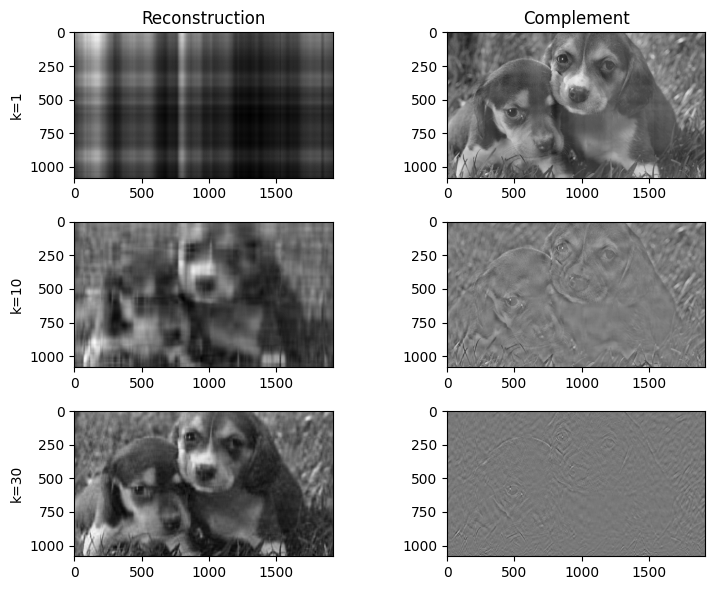

In [5]:
from PIL import Image

# Load image and extract one channel -> grayscale
image = Image.open('../img/dog.jpg')
image = np.array(image)[:, :, 0]

# Get SVD
U, s, VT = np.linalg.svd(image)
S = np.zeros([U.shape[1], VT.shape[0]])
np.fill_diagonal(S[:len(s), :len(s)], s)


# Low-rank reconstruction
# The two images below add to the original image! recon + compl = image
fig, ax = plt.subplots(3, 2, figsize=(8, 6))
for i, k in enumerate([1, 10, 30]):
    recon = U[:, :k] @ S[:k, :k] @ VT[:k, :]
    compl = U[:, k:] @ S[k:, k:] @ VT[k:, :]

    ax[i, 0].set_ylabel(f'k={k}')
    ax[i, 0].imshow(recon, cmap='gray')
    ax[i, 1].imshow(compl, cmap='gray')

ax[0, 0].set_title("Reconstruction")
ax[0, 1].set_title("Complement")
fig.tight_layout()

  By only using 30 layers, we are able to reconstruct almost all semantically meaningful information content of the image. The rest of the ~1000 layers provides information about the noise as evidenced by the scree plot. In contrast, a random matrix has a scree plot that has almost a linear shape which indicates that there is no semantic meaning in the matrix which manifests as a low-dimensional structure.


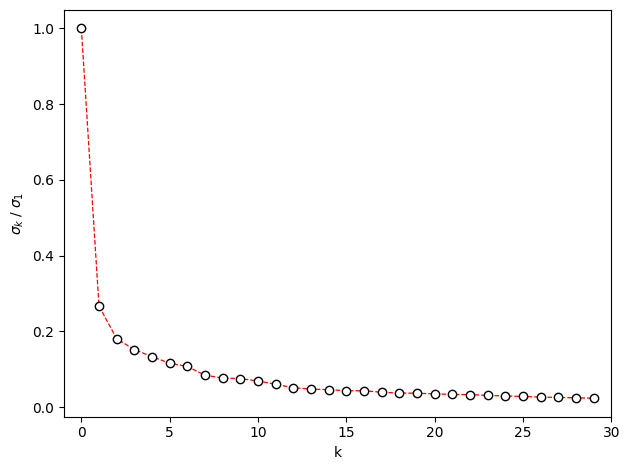

In [6]:
x = range(len(s))
s = s / s[0]
plt.plot(x[:30], s[:30], color='red', linestyle='dashed', linewidth=0.9)
plt.scatter(x[:30], s[:30], marker='o', facecolor='white', edgecolors='k', color="C0", zorder=3)
plt.ylabel(f'$\sigma_k\; /\; \sigma_1$')
plt.xlabel(f'k')
plt.xlim(-1, 30)
plt.tight_layout()

(2.15) **Smooth KDE.** Dog image too large, instead we make an artificial example of a sum of 2D Gaussians to demonstrate the idea of how the relatively low number of layers in the SVD decomposition provide the majority of information in a matrix. The nonzero singular values occupy a small bright streak on the upper left of the middle plot. Moreover, the first few singular vectors look meaningful whereas the rest look more and more like noise &mdash; these are the singular vectors that reconstruct most of the meaningful structure in the matrix. This is not the case for the random matrix where there is no low-dimensional or low-rank structure.

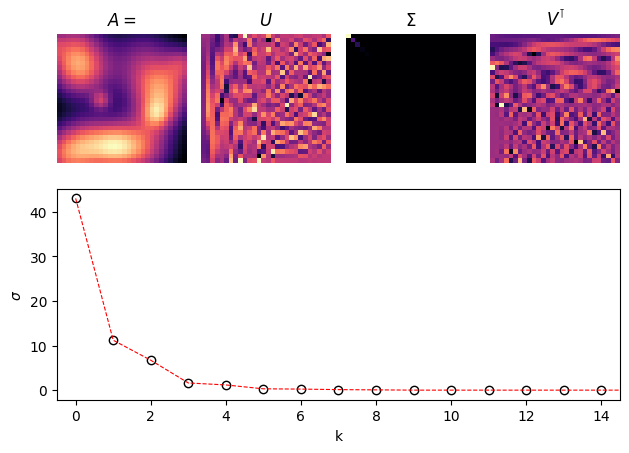

In [7]:
from src.utils import plot_svd_scree

np.random.seed(0)

# 50 looks like a good number
A = np.zeros([28, 28])

# Make a KDE of 10 gaussians
x = np.arange(28)
y = np.arange(28)
xx, yy = np.meshgrid(x, y)

z  = np.exp((-(-xx -  3)**2 - (yy - 2)**2)/10.0)
h1 = np.random.choice(np.arange(28), 15)
h2 = np.random.choice(np.arange(28), 15)
h3 = np.random.choice(np.arange(2, 28), 15)
for (x, y, t) in zip(h1, h2, h3):
    z += np.exp((-(xx - x)**2 - (yy - y)**2)/(2*t))

plot_svd_scree(z)

(2.16) **Low-dimensional structure.** One feature of the layer perspective is that it reveals the low rank structure of $\mathbf A$ in terms of $\mathbf A_k = \sum_{j=1}^k \sigma_j \mathbf u_j \mathbf v_j^\top$ as a $k$-rank approximation of $\mathbf A.$ Recall that it can happen that $k \ll \min(m, n)$ while $\sum_{j = 1}^k \sigma_j  \approx \sum_{j = 1}^{\min(m, n)}  \sigma_j.$ This was demonstrated above in the dog image example where the sum of the first few layers gives a good approximation to the image. In this case, we say that the image has a low-dimensional structure that we are able to approximate using the first $k$ layers with the strongest singular values. 

<br>

(2.17) **Eckart-Young Theorem.** In the above bullet, we discussed the concept of low-rank approximation. Knowing that $\mathbf A$ has a low-rank structure from the scree plot, is there a better approximation than the natural $\mathbf A_k$? It turns out that by the Eckart-Young theorem that there is none:

  > (Eckart-Young). If $\mathbf B$ is a rank $k$ matrix, then $\lVert \mathbf A - \mathbf B \rVert \geq \lVert \mathbf A - \mathbf A_k \rVert.$ 

  Note that the norm $\lVert \cdot \rVert$ used here is the operator norm defined in the next section.

  <br>

**Proof.** Let $\mathbf v_1, \ldots, \mathbf v_n$ be right singular vectors of $\mathbf A.$ Note that $\dim \mathsf{N}(\mathbf B) = n-k$ (rank-nullity theorem) and $\dim \mathsf{C}(\mathbf v_1, \ldots, \mathbf v_{k+1}) = k+1.$ Let $\mathbf u_1, \ldots, \mathbf u_{n-k}$ be a basis of $\mathsf{N}(\mathbf B).$ So the dimensions of the two subspaces sum to $n + 1.$ It follows that there exists $j$ such that $\mathbf u_j = a_1\mathbf u_1 + \ldots a_{j-1}\mathbf u_{j-1} + \sum_{i=1}^{k+1}c_i\mathbf v_i$ where $c_i$ are not all zero. Otherwise, $\mathbf u_j$ is a linear combination of the earlier vectors. Let $\mathbf u = \mathbf u_j - \sum_{l=1}^{j-1}c_l\mathbf u_l.$ Thus, $\mathbf u = \sum_{j=1}^{k+1} c_i \mathbf v_i$ and $\mathbf B \mathbf u = \mathbf 0.$ Rescale the coefficients so that $\mathbf u$ is a unit vector. Then,
    $$
    \|\mathbf A-\mathbf B\|^{2} \geq\|(\mathbf A-\mathbf B) \mathbf u\|^{2}=\|\mathbf A \mathbf u \|^{2}=\sum_{i=1}^{k+1} {c_i}^2 {\sigma_{i}}^{2} \geq \sigma_{k+1}^{2} \sum_{i=1}^{k+1}{c_i}^2 = \sigma_{k+1}^{2}.
    $$

We know that $\|\mathbf A-\mathbf A_k\| = \sigma_{k+1}$ since this is just the matrix obtained by replacing the first singular values by zero, i.e. flattening the first $k$ axes of the ellipse. It follows that $\|\mathbf A-\mathbf B\| \geq \|\mathbf A-\mathbf A_k\|.$ □

<br>